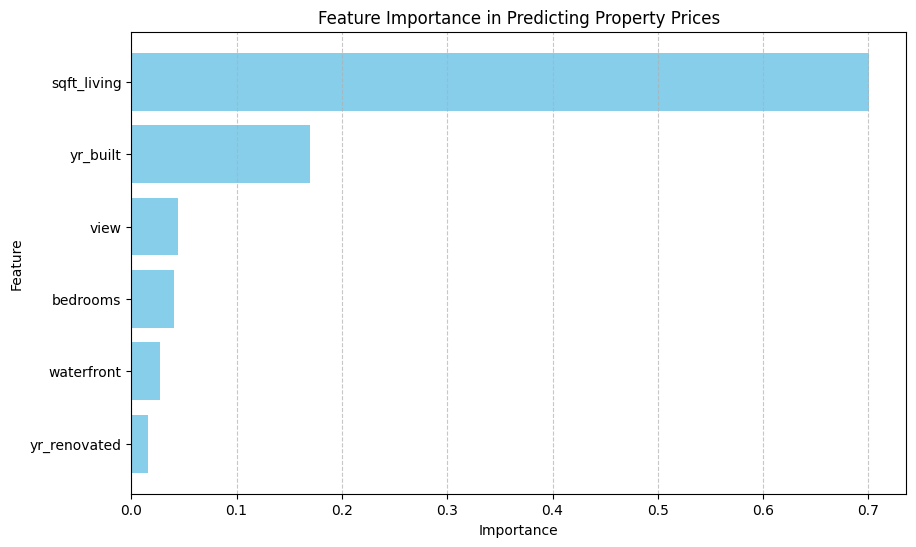

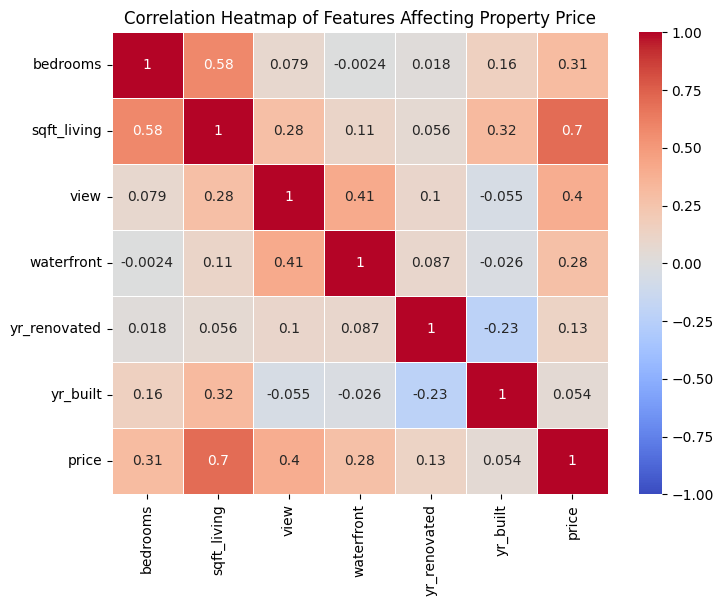

In [155]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor  # to install !pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# 2. Load Data
#file_path = 'data/King_County_House_prices_dataset.csv'  # Update with your file path
data = pd.read_csv('data/King_County_House_prices_dataset.csv')

# 3. Data Cleaning and Preprocessing
# Convert date column to datetime and extract year and month if needed
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

# Calculate density score based on surrounding living area and lot size
data['density_score'] = data['sqft_living15'] / data['sqft_lot15']

# Define central and remote areas based on density score thresholds
central_threshold = data['density_score'].quantile(0.75)
remote_threshold = data['density_score'].quantile(0.25)
data['area_type'] = data['density_score'].apply(lambda x: 'Central' if x >= central_threshold else ('Remote' if x <= remote_threshold else 'Intermediate'))

# Select features and target for feature importance analysis
features = ['bedrooms', 'sqft_living', 'view', 'waterfront', 'yr_renovated', 'yr_built']
X = data[features]
y = data['price']

# 4. Preprocessing Pipeline for Feature Importance Analysis
preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Fill missing values
    ('scaler', StandardScaler())  # Standardize features
])
X_processed = preprocessor.fit_transform(X)

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Fit RandomForestRegressor for feature importance
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Calculate and plot feature importances
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# 5. Plotting Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title("Feature Importance in Predicting Property Prices")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

# 6. Correlation Heatmap
correlation_matrix = data[features + ['price']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Heatmap of Features Affecting Property Price")
plt.show()


In [157]:
!pip install scikit-learn
!pip install folium

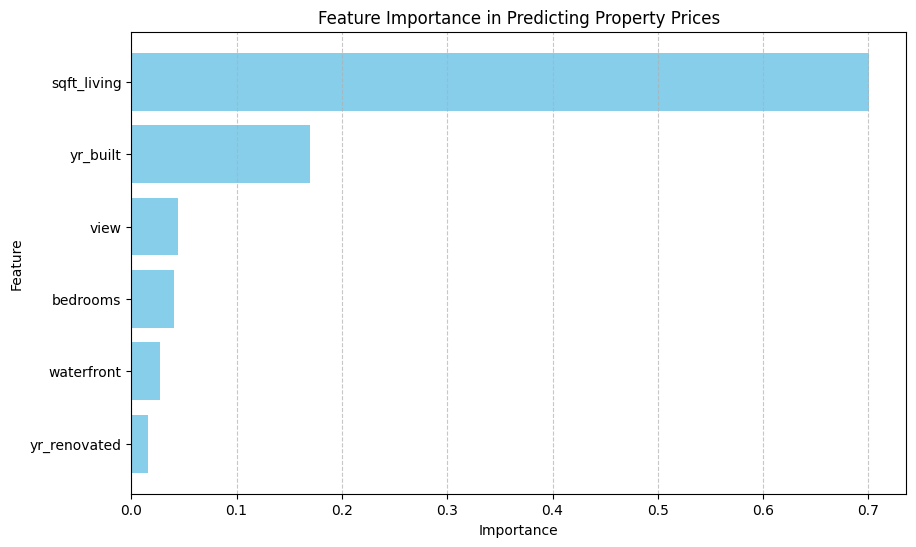

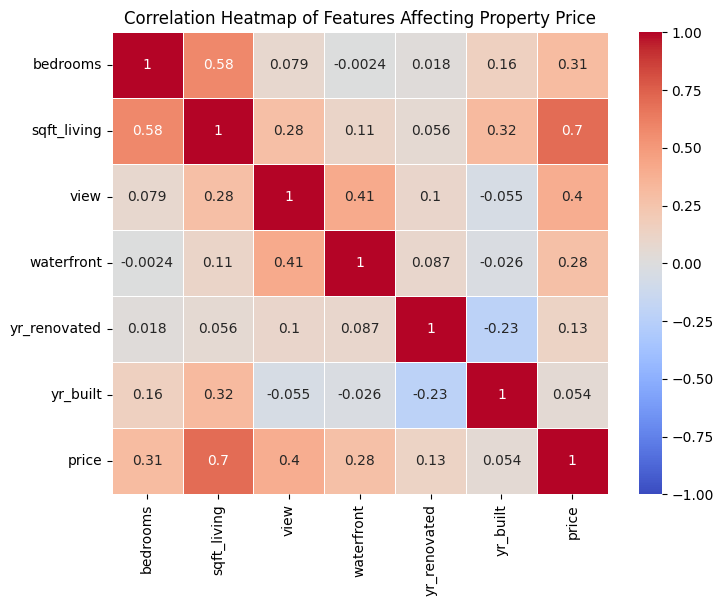

Recommended Zip Codes for High-Value Central Properties in June:
zipcode
98056   2106666.667
98125   2050000.000
98102   1630105.619
98112   1548630.841
98033   1502777.778
Name: price, dtype: float64
Recommended Zip Codes for Average-Priced Remote Properties:
zipcode
98155    64
98042    37
98059    36
98072    33
98034    32
Name: count, dtype: int64
Heatmap saved as 'Seattle_Remote_Areas_Heatmap.html'


In [158]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from folium import Map
from folium.plugins import HeatMap
import folium

# 2. Load Data
file_path = 'data/King_County_House_prices_dataset.csv'  # Update with your file path
data = pd.read_csv(file_path)

# 3. Data Cleaning and Preprocessing
# Convert date column to datetime and extract year and month if needed
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

# Calculate density score based on surrounding living area and lot size
data['density_score'] = data['sqft_living15'] / data['sqft_lot15']

# Define central and remote areas based on density score thresholds
central_threshold = data['density_score'].quantile(0.75)
remote_threshold = data['density_score'].quantile(0.25)
data['area_type'] = data['density_score'].apply(lambda x: 'Central' if x >= central_threshold else ('Remote' if x <= remote_threshold else 'Intermediate'))

# Select features and target for feature importance analysis
features = ['bedrooms', 'sqft_living', 'view', 'waterfront', 'yr_renovated', 'yr_built']
X = data[features]
y = data['price']

# 4. Preprocessing Pipeline for Feature Importance Analysis
preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Fill missing values
    ('scaler', StandardScaler())  # Standardize features
])
X_processed = preprocessor.fit_transform(X)

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Fit RandomForestRegressor for feature importance
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Calculate and plot feature importances
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# 5. Plotting Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title("Feature Importance in Predicting Property Prices")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

# 6. Correlation Heatmap
correlation_matrix = data[features + ['price']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Heatmap of Features Affecting Property Price")
plt.show()

# 7. Identifying Central and Remote Properties for Recommendations

# Step 1: Filter for central properties in the top 10% by price
central_properties = data[data['area_type'] == 'Central']
central_top_10_threshold = central_properties['price'].quantile(0.9)
central_top_10_properties = central_properties[central_properties['price'] >= central_top_10_threshold]

# Step 2: Identify high-value zip codes in central areas for focused selling recommendations
high_value_central_zipcodes = central_top_10_properties.groupby('zipcode')['price'].mean().nlargest(5)
recommended_month = "June"  # Based on earlier findings for central area seasonality
print("Recommended Zip Codes for High-Value Central Properties in June:")
print(high_value_central_zipcodes)

# 8. Identifying Remote Properties for Quiet Areas

# Step 1: Define remote areas using the previously identified remote properties
remote_area_properties = data[data['area_type'] == 'Remote']

# Step 2: Filter for properties around the median price within remote areas
remote_median_price = remote_area_properties['price'].median()
avg_remote_properties = remote_area_properties[
    (remote_area_properties['price'] >= remote_median_price * 0.9) & 
    (remote_area_properties['price'] <= remote_median_price * 1.1)
]
recommended_remote_zipcodes = avg_remote_properties['zipcode'].value_counts().nlargest(5)
print("Recommended Zip Codes for Average-Priced Remote Properties:")
print(recommended_remote_zipcodes)

# 9. Creating Heatmap of Recommended Remote Areas
# Filter remote properties within recommended zip codes and average price range
heatmap_data = avg_remote_properties[avg_remote_properties['zipcode'].isin(recommended_remote_zipcodes.index)]
heatmap_points = heatmap_data[['lat', 'long', 'price']].values.tolist()

# Initialize a folium map centered around Seattle
seattle_map = folium.Map(location=[47.6062, -122.3321], zoom_start=10)

# Create heatmap layer
HeatMap(heatmap_points, min_opacity=0.4, max_opacity=0.8, radius=15, blur=15).add_to(seattle_map)

# Save the map
seattle_map.save("Seattle_Remote_Areas_Heatmap.html")
print("Heatmap saved as 'Seattle_Remote_Areas_Heatmap.html'")
